## Import Packages

In [1]:
import pandas as pd 
import numpy as np
import pytse_client as tse
import matplotlib.pyplot as plt 
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import mplfinance as mpf
from sklearn import metrics

## Data Preparation

C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_3052\2137460432.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['volume'],1)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_3052\2137460432.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['value'],1)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_3052\2137460432.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['count'],1)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_3052\2137460432.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['yesterday'],1)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_3052\21374

<AxesSubplot:xlabel='date'>

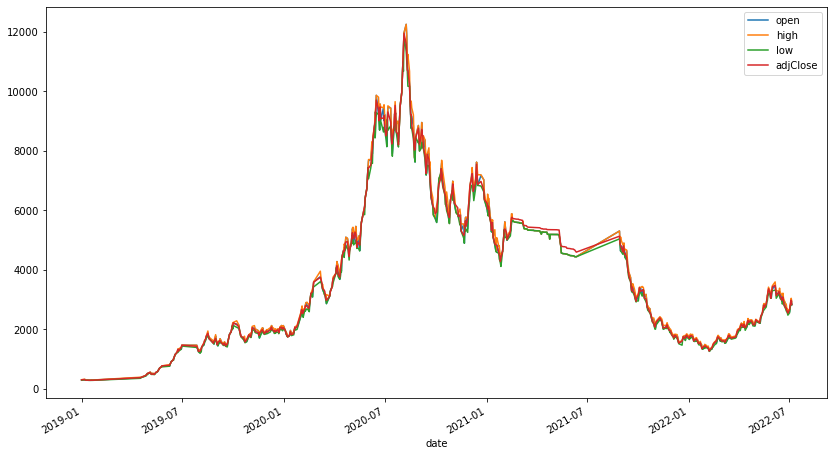

In [2]:
TehranMarket = tse.download(symbols="قثابت", write_to_csv=True, adjust=True)
df = pd.read_csv("C:/Users/Kazem Kamrani/Desktop/Jupyter/tickers_data/قثابت-ت.csv", index_col = "date",
                 parse_dates = True,
                 na_values=['nan'])

df = pd.DataFrame(df)
df =df.drop(['volume'],1)
df =df.drop(['value'],1)
df =df.drop(['count'],1)
df =df.drop(['yesterday'],1)
df =df.drop(['close'],1)
df =df['2019-01-01':]
#print(df)
df.plot(figsize=(14,8))

In [3]:
df['open1'] = df['open'].shift(-1)
df['high1'] = df['high'].shift(-1)
df['low1'] = df['low'].shift(-1)
df['adjClose1'] = df['adjClose'].shift(-1)

df['open2'] = df['open'].shift(-2)
df['high2'] = df['high'].shift(-2)
df['low2'] = df['low'].shift(-2)
df['adjClose2'] = df['adjClose'].shift(-2)

df['open3'] = df['open'].shift(-3)
df['high3'] = df['high'].shift(-3)
df['low3'] = df['low'].shift(-3)
df['adjClose3'] = df['adjClose'].shift(-3)

df['open4'] = df['open'].shift(-4)
df['high4'] = df['high'].shift(-4)
df['low4'] = df['low'].shift(-4)
df['adjClose4'] = df['adjClose'].shift(-4)

df = df[:-4]
print(df)

              open    high     low  adjClose   open1   high1    low1  \
date                                                                   
2019-01-01   292.0   305.0   289.0     301.0   304.0   320.0   300.0   
2019-01-06   304.0   320.0   300.0     311.0   315.0   315.0   297.0   
2019-01-07   315.0   315.0   297.0     301.0   296.0   299.0   287.0   
2019-01-08   296.0   299.0   287.0     291.0   289.0   298.0   286.0   
2019-01-09   289.0   298.0   286.0     289.0   289.0   294.0   286.0   
...            ...     ...     ...       ...     ...     ...     ...   
2022-06-26  2700.0  2840.0  2620.0    2716.0  2695.0  2695.0  2581.0   
2022-06-27  2695.0  2695.0  2581.0    2614.0  2614.0  2688.0  2550.0   
2022-06-28  2614.0  2688.0  2550.0    2604.0  2600.0  2620.0  2474.0   
2022-06-29  2600.0  2620.0  2474.0    2541.0  2580.0  2668.0  2550.0   
2022-07-02  2580.0  2668.0  2550.0    2660.0  2749.0  2793.0  2711.0   

            adjClose1   open2   high2    low2  adjClose2   open

In [4]:
forecast_out = int(2)
df['PredictionClose'] = df['adjClose4'].shift(-forecast_out)
print(df)

              open    high     low  adjClose   open1   high1    low1  \
date                                                                   
2019-01-01   292.0   305.0   289.0     301.0   304.0   320.0   300.0   
2019-01-06   304.0   320.0   300.0     311.0   315.0   315.0   297.0   
2019-01-07   315.0   315.0   297.0     301.0   296.0   299.0   287.0   
2019-01-08   296.0   299.0   287.0     291.0   289.0   298.0   286.0   
2019-01-09   289.0   298.0   286.0     289.0   289.0   294.0   286.0   
...            ...     ...     ...       ...     ...     ...     ...   
2022-06-26  2700.0  2840.0  2620.0    2716.0  2695.0  2695.0  2581.0   
2022-06-27  2695.0  2695.0  2581.0    2614.0  2614.0  2688.0  2550.0   
2022-06-28  2614.0  2688.0  2550.0    2604.0  2600.0  2620.0  2474.0   
2022-06-29  2600.0  2620.0  2474.0    2541.0  2580.0  2668.0  2550.0   
2022-07-02  2580.0  2668.0  2550.0    2660.0  2749.0  2793.0  2711.0   

            adjClose1   open2   high2  ...  adjClose2   open3  

C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_3052\86116978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PredictionClose'] = df['adjClose4'].shift(-forecast_out)


In [5]:
X = np.array(df.drop(['PredictionClose'],1))
X = preprocessing.scale(X)
X_forecast = X[-(forecast_out):]
X = X[:-(forecast_out)]
Y = np.array(df['PredictionClose'])
Y = Y[:-(forecast_out)]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_3052\3375762268.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['PredictionClose'],1))


## Neural Network

In [6]:
# Training
Neurons = 40
model = Sequential()
model.add(Dense(Neurons,activation='relu')) # Input Layer 
model.add(Dense(Neurons,activation='relu'))       
model.add(Dense(Neurons,activation='relu')) 
model.add(Dense(1)) # Output Layer
model.compile(optimizer='Adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose= 1, patience= 5)
model.fit(x = X_train, y = Y_train,
          validation_data=(X_test, Y_test),
          batch_size= 256,
          epochs= 1000,
          callbacks=[early_stop]
          )

Epoch 1/1000
3/3 [==============================] - 1s 82ms/step - loss: 21131960.0000 - val_loss: 22128302.0000
Epoch 2/1000
3/3 [==============================] - 0s 13ms/step - loss: 21130232.0000 - val_loss: 22126748.0000
Epoch 3/1000
3/3 [==============================] - 0s 16ms/step - loss: 21128820.0000 - val_loss: 22125370.0000
Epoch 4/1000
3/3 [==============================] - 0s 13ms/step - loss: 21127536.0000 - val_loss: 22123888.0000
Epoch 5/1000
3/3 [==============================] - 0s 16ms/step - loss: 21126136.0000 - val_loss: 22122318.0000
Epoch 6/1000
3/3 [==============================] - 0s 13ms/step - loss: 21124604.0000 - val_loss: 22120546.0000
Epoch 7/1000
3/3 [==============================] - 0s 14ms/step - loss: 21122974.0000 - val_loss: 22118552.0000
Epoch 8/1000
3/3 [==============================] - 0s 14ms/step - loss: 21121108.0000 - val_loss: 22116226.0000
Epoch 9/1000
3/3 [==============================] - 0s 13ms/step - loss: 21118848.0000 - val_los

3/3 [==============================] - 0s 12ms/step - loss: 3580235.7500 - val_loss: 3362352.5000
Epoch 74/1000
3/3 [==============================] - 0s 12ms/step - loss: 3503132.0000 - val_loss: 3306922.0000
Epoch 75/1000
3/3 [==============================] - 0s 12ms/step - loss: 3452524.7500 - val_loss: 3274896.2500
Epoch 76/1000
3/3 [==============================] - 0s 11ms/step - loss: 3423233.7500 - val_loss: 3252643.7500
Epoch 77/1000
3/3 [==============================] - 0s 13ms/step - loss: 3398981.5000 - val_loss: 3230336.5000
Epoch 78/1000
3/3 [==============================] - 0s 13ms/step - loss: 3384064.7500 - val_loss: 3214057.2500
Epoch 79/1000
3/3 [==============================] - 0s 13ms/step - loss: 3369304.2500 - val_loss: 3204541.5000
Epoch 80/1000
3/3 [==============================] - 0s 12ms/step - loss: 3359952.7500 - val_loss: 3197711.7500
Epoch 81/1000
3/3 [==============================] - 0s 11ms/step - loss: 3354481.0000 - val_loss: 3192109.5000
Epoch 

<AxesSubplot:>

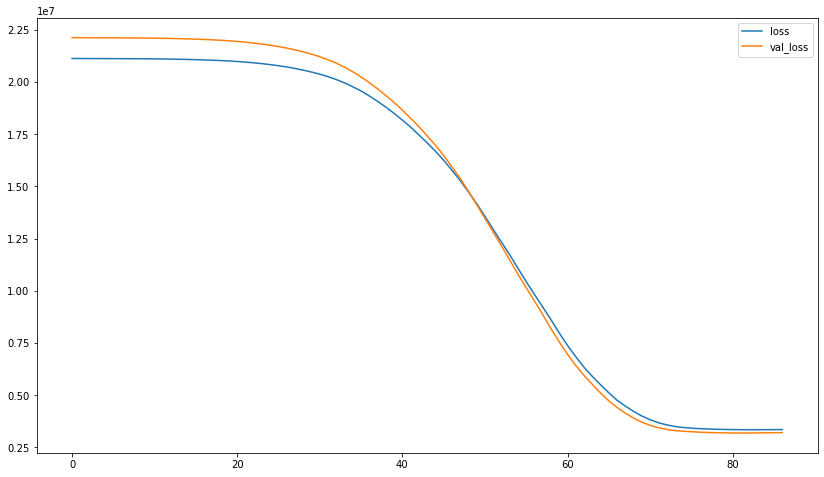

In [7]:
loss = pd.DataFrame(model.history.history)
loss.plot(figsize=(14,8))

In [8]:
testpredictions = model.predict(X_test)

5/5 [==============================] - 0s 1ms/step


In [9]:
#Testing
print('R2 Score is: ', metrics.explained_variance_score(Y_test, testpredictions))
print('Mean Squared Error is: ', metrics.mean_squared_error(Y_test, testpredictions))
print('Root Mean Squared Error is: ', np.sqrt(metrics.mean_squared_error(Y_test, testpredictions)))
print('Mean Absolute Error is: ', metrics.mean_absolute_error(Y_test, testpredictions))
print('Mean Absolute Percentage Error is: ', metrics.mean_absolute_percentage_error(Y_test, testpredictions))

R2 Score is:  0.6011514348820438
Mean Squared Error is:  3206007.704067634
Root Mean Squared Error is:  1790.532798936572
Mean Absolute Error is:  1409.0862800539003
Mean Absolute Percentage Error is:  0.6240179360495357


In [10]:
print(X_forecast)

[[-0.49514465 -0.50635782 -0.52392232 -0.52299127 -0.50529591 -0.48981313
  -0.49522843 -0.47789989 -0.44029033 -0.44317264 -0.43185699 -0.43515635
  -0.40989352 -0.39923864 -0.38921199 -0.38676761 -0.34457595 -0.35079979
  -0.35088596 -0.35932474]
 [-0.50308382 -0.48763295 -0.49301106 -0.47571211 -0.43811624 -0.44098264
  -0.42965336 -0.43294154 -0.4076482  -0.3970115  -0.38699009 -0.38455552
  -0.34252137 -0.34870098 -0.34877273 -0.35724045 -0.41244391 -0.39513336
  -0.38933875 -0.4172657 ]]


In [11]:
forecast_prediction = model.predict(X_forecast)
print(forecast_prediction)

1/1 [==============================] - 0s 15ms/step
[[1041.9453]
 [ 997.1843]]


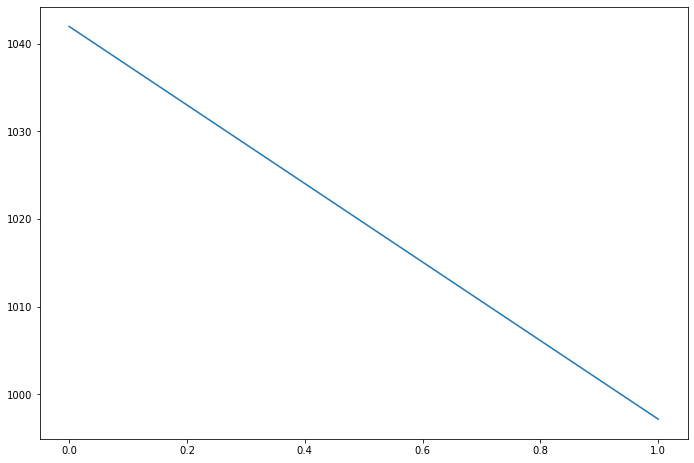

In [12]:
plt.axes([1, 2, 1.5 , 1.5])
plt.plot(forecast_prediction)

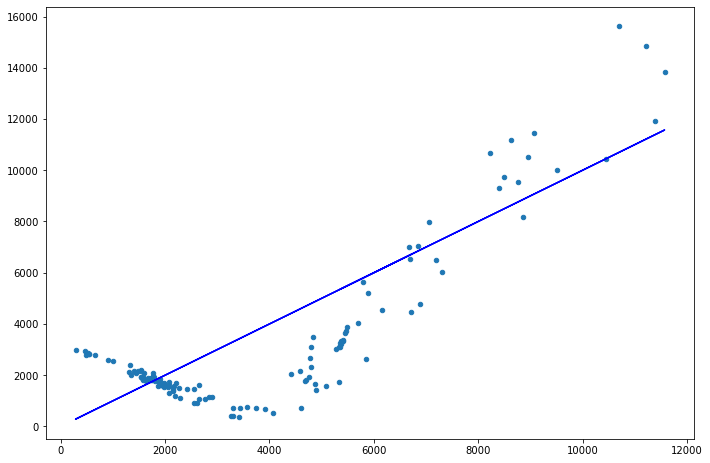

In [13]:
plt.axes([1, 1.5, 1.5 , 1.5])
plt.scatter(Y_test, testpredictions,s=20)
plt.plot(Y_test, Y_test, 'b')

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes:ylabel='Density'>

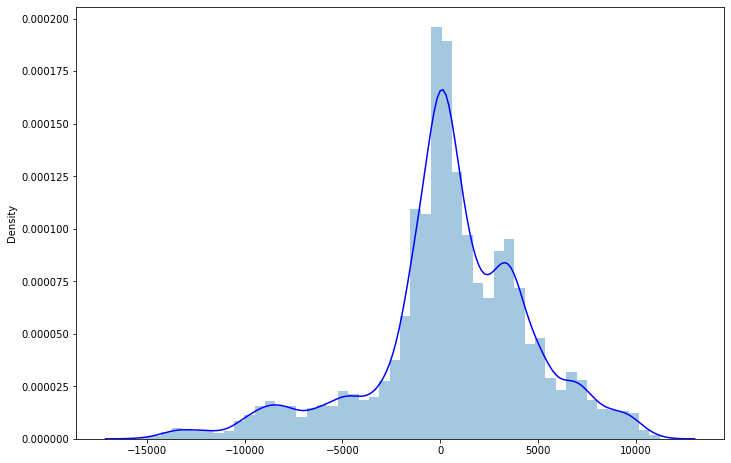

In [14]:
plt.axes([1, 2, 1.5 , 1.5])
sns.distplot(Y_test-testpredictions, kde=True, kde_kws={'color':'b'}, bins=50)